In [1]:
import Gameinfo.Objfunc as obj
import matplotlib.pyplot as plt
import Gameinfo.parser as ps

In [2]:
# load score matrix
scorematrix = ps.parse_score_matrix_file("./data/score_matrix.txt")
objscorematrix = []
objscorematrix.append([*scorematrix[0][1][0], *scorematrix[0][2][0], *[0 for x in range(56)]])
objscorematrix.append([*scorematrix[2][1][0], *scorematrix[2][2][0], *[0 for x in range(56)]])
objmatrixname = []
objmatrixname.append("HCP")
objmatrixname.append("Neural")
for i in range(4, len(scorematrix)):
    objmatrixname.append(scorematrix[i][0])
    objscorematrix.append([*scorematrix[i][1][0], *scorematrix[i][2][0], *[0 for x in range(56)]])

In [3]:
C = obj.corrobj()
C.loader("./data/DDSresult.txt")
C.filter(len(C.data))

In [4]:
def getappear(DDS, score):
    ret = [[] for x in range(28)]
    for i in range(len(DDS)):
        ret[int(DDS[i] * 2)].append(round(score[i], 4))
    for i in range(28):
        ret[i].sort()
        ret[i] = dict((a, ret[i].count(a)) for a in ret[i])
    return ret.copy()

In [15]:
def plottheappear(appear, name):
    plt.title(name)
    plt.plot(range(len(appear[14])), list(appear[14].values()), color = 'red', label = '7')
    plt.plot(range(len(appear[15])), list(appear[15].values()), color = 'tomato', label = '7.5')
    plt.plot(range(len(appear[16])), list(appear[16].values()), color = 'darkorange', label = '8')
    plt.plot(range(len(appear[17])), list(appear[17].values()), color = 'darkgoldenrod', label = '8.5')
    plt.plot(range(len(appear[18])), list(appear[18].values()), color = 'gold', label = '9')
    plt.plot(range(len(appear[19])), list(appear[19].values()), color = 'yellow', label = '9.5')
    plt.plot(range(len(appear[20])), list(appear[20].values()), color = 'darkolivegreen', label = '10')
    plt.plot(range(len(appear[21])), list(appear[21].values()), color = 'greenyellow', label = '10.5')
    plt.plot(range(len(appear[22])), list(appear[22].values()), color = 'c', label = '11')
    plt.plot(range(len(appear[23])), list(appear[23].values()), color = 'lightblue', label = '11.5')
    plt.plot(range(len(appear[24])), list(appear[24].values()), color = 'navy', label = '12')
    plt.plot(range(len(appear[25])), list(appear[25].values()), color = 'indigo', label = '12.5')
    plt.plot(range(len(appear[26])), list(appear[26].values()), color = 'purple', label = '13')
    plt.legend(framealpha=1, frameon=True)
    plt.savefig(name + ".png")
    plt.close('all')

In [6]:
def tostandard(appear):
    for i in range(len(appear)):
        s = 0
        for j in appear[i]:
            s += appear[i][j]
        for j in appear[i]:
            appear[i][j] = appear[i][j] / s
    return appear

In [16]:
for i in range(len(objscorematrix)):
    C.set_scorematrix(objscorematrix[i])
    C.scorer()
    appear = getappear(C.DDS, C.score)
    appear = tostandard(appear)
    plottheappear(appear, objmatrixname[i])

KeyboardInterrupt: 

In [8]:
# Only HCP
C.scorer()
appear = getappear(C.DDS, C.score)
appear = tostandard(appear)

KeyboardInterrupt: 

In [9]:
plt.show()
plt.show()

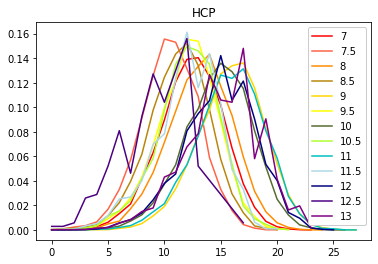

In [12]:
plottheappear(appear, "HCP")
plt.show()
plt.show()

In [ ]:
# NN result
C.set